In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re

In [2]:
def load_data_parsed(model, item='orbit', dir='.'):
    pattern = re.compile(rf"{model}_mass_spring_{item}_order_(?P<order>\d{{4}})_tend_(?P<tend>[\d.]+)\.npy")
    
    file_found = False
    order_val = None
    tend_val = None
    data = None

    for fname in os.listdir(dir):
        match = pattern.match(fname)
        if match:
            file_found = True

            order_val = match.group('order')
            tend_val = float(match.group('tend'))
            file_path = os.path.join(dir, fname)

            data = np.load(file_path)
            print(f"Data loading done: {fname}")
            print(f"Parsed info -> Order: {order_val}, T_end: {tend_val}")
            break
            
    if not file_found:
        print(f"Error: {model} model's {item} data can not be found.")
        return None, None, None

    return data, order_val, tend_val


In [3]:
hnn_data, hnn_order, hnn_tend = load_data_parsed(model="HNN")

if hnn_data is not None:
    print(f"HNN (Hamiltonian NN) data order: {hnn_order}")
    print(f"HNN (Hamiltonian NN) simultion end time: {hnn_tend}")

Data loading done: HNN_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
HNN (Hamiltonian NN) data order: 0123
HNN (Hamiltonian NN) simultion end time: 5.0


In [4]:
lnn_data, lnn_order, lnn_tend = load_data_parsed(model="LNN")

if lnn_data is not None:
    print(f"LNN (Lagrangian NN) data order: {lnn_order}")
    print(f"LNN (Lagrangian NN) simulation end time: {lnn_tend}")

Data loading done: LNN_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
LNN (Lagrangian NN) data order: 0123
LNN (Lagrangian NN) simulation end time: 5.0


In [5]:
true_data, true_order, true_tend = load_data_parsed(model="TRUE")

if true_data is not None:
    print(f"TRUE data order: {true_order}")
    print(f"TRUE simulation end time: {true_tend}")

Data loading done: TRUE_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
TRUE data order: 0123
TRUE simulation end time: 5.0


In [6]:
sym_data, sym_order, sym_tend = load_data_parsed(model="SYM")

if true_data is not None:
    print(f"SYM (Neural Symplectic Form) data order: {sym_order}")
    print(f"SYM (Neural Symplecitc Form simulation end time: {sym_tend}")

Data loading done: SYM_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
SYM (Neural Symplectic Form) data order: 0123
SYM (Neural Symplecitc Form simulation end time: 5.0


In [7]:
skew_data, skew_order, skew_tend = load_data_parsed(model="SKEW")

if skew_data is not None:
    print(f"SKEW (Skew Matrix Learning) data order: {skew_order}")
    print(f"SKEW simulation end time: {skew_tend}")

Data loading done: SKEW_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
SKEW (Skew Matrix Learning) data order: 0123
SKEW simulation end time: 5.0


In [8]:
node_data, node_order, node_tend = load_data_parsed(model="NODE")

if true_data is not None:
    print(f"NODE (Neural ODE) data order: {node_order}")
    print(f"NODE (Neural ODE) simulation end time: {node_tend}")

Data loading done: NODE_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
NODE (Neural ODE) data order: 0123
NODE (Neural ODE) simulation end time: 5.0


In [9]:
models = ["TRUE", "SYM", "NODE", "SKEW", "LNN", "HNN"]
orbits = []
for model in models:
    orbit, order, tend = load_data_parsed(model=model)
    orbits.append({'model': model, 'order': order, 'tend': tend})
print(orbits)

Data loading done: TRUE_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: SYM_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: NODE_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: SKEW_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: LNN_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: HNN_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
[{'model': 'TRUE', 'order': '0123', 'tend': 5.0}, {'model': 'SYM', 'order': '0123', 'tend': 5.0}, {'model': 'NODE', 'order': '0123', 'tend': 5.0}, {'model': 'SKEW', 'order': '0123', 'tend': 5.0}, {'model': 'LNN', 'order': '0123', 'tend': 5.0}, {'model': 'HNN', 'order': '0123', 'tend': 5.0}]


In [10]:
models = ["TRUE", "SYM", "NODE", "SKEW", "LNN", "HNN"]
orbits = []

for model in models:
    data, order, tend = load_data_parsed(model=model)
    
    if data is not None:
        orbits.append({
            'model': model, 
            'data': data,
            'order': order, 
            'tend': tend
        })

print("--- Loaded orbit info summary ---")
for item in orbits:
    print(f"Model: {item['model']}, Shape: {item['data'].shape}, Order: {item['order']}, T_end: {item['tend']}")

def get_orbit_by_model(model_name, orbit_list):
    for item in orbit_list:
        if item['model'] == model_name:
            return item['data']
    return None

true_orbit = get_orbit_by_model("TRUE", orbits)
if true_orbit is not None:
    print(f"\nTRUE's first 5 data of q1: {true_orbit[:5, 0]}")

Data loading done: TRUE_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: SYM_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: NODE_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: SKEW_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: LNN_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
Data loading done: HNN_mass_spring_orbit_order_0123_tend_5.0.npy
Parsed info -> Order: 0123, T_end: 5.0
--- Loaded orbit info summary ---
Model: TRUE, Shape: (100, 4), Order: 0123, T_end: 5.0
Model: SYM, Shape: (100, 4), Order: 0123, T_end: 5.0
Model: NODE, Shape: (100, 4), Order: 0123, T_end: 5.0
Model: SKEW, Shape: (100, 4), Order: 0123, T_end: 5.0
Model: LNN, Shape: (100, 4), Order: 0123, T_end: 5.0
Model: HNN, Shape: (100, 4), Order: 0123, T_end: 5.0

TRUE's first 5 da

In [11]:
tend = get_orbit_by_model("TRUE", orbits)
for orbit in orbits:
    if orbit['model'] == 'TRUE':
        tend = orbit['tend']
        M = orbit['data'].shape[0]

print('t_end:', tend, 'M:',M)

t_eval = np.linspace(0,tend,M)

t_end: 5.0 M: 100


In [12]:
def plot_orbits(t_eval, orbits):
    
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    fig.suptitle('Mass Spring Trajectory Comparison')

    labels_teX = [r'$q_{1}$', r'$q_{2}$', r'$v_{1}$', r'$v_{2}$']
    
    styles = {
        'TRUE': ('black', '-'),
        'SYM': ('red', '-'),
        'NODE': ('blue', '-'),
        'SKEW': ('green', '-'),
        'LNN': ('orange', '--'),
        'HNN': ('gray', '--'),
    }
    
    # Data order: (q1, v1, q2, v2) assumed
    ind = [0, 1, 2, 3]

    axes_flat = axes.flatten()

    for i, orbit in enumerate(orbits):
        model_name = orbit['model']
        data = orbit['data']
        color, linestyle = styles.get(model_name, ('gray', '-'))

        if orbit['order'] == '0213':
            ind[1]=2
            ind[2]=1

        for j, ax in enumerate(axes_flat):
            ax.plot(t_eval, data[:, ind[j]], color=color, linestyle=linestyle, label=f"{model_name}")
    for j, ax in enumerate(axes_flat):
        ax.set_title(labels_teX[j])
        ax.set_xlabel("Time")
        ax.set_ylabel("Value")
        ax.legend(loc='upper right', fontsize='small')
        ax.grid(True, linestyle='--', alpha=0.6)
        # ax.set_ylim([-5, 5])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("./figures/mass_spring_asis_trained_models_orbits_compared_by_danieljh.png", dpi=150) # PNG saved
    plt.show()

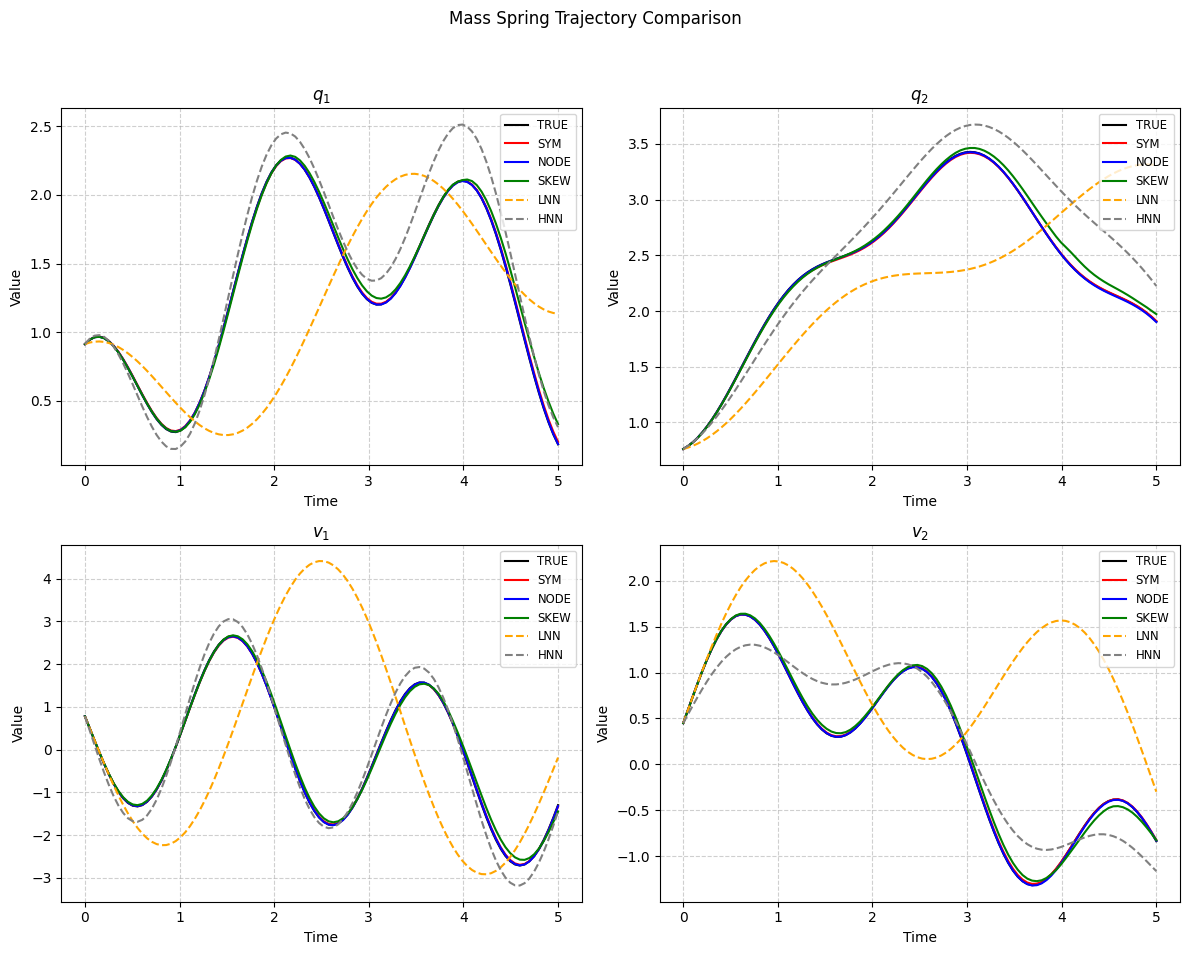

In [13]:
plot_orbits(t_eval, orbits)

In [14]:
def load_data_parsed_energy(model, item_pattern, dir='.'):

    pattern = re.compile(rf"{model}_mass_spring_{item_pattern}_order_(?P<order>\d{{4}})_tend_(?P<tend>[\d.]+)\.npy")
    
    data_list = []

    for fname in os.listdir(dir):
        match = pattern.match(fname)
        if match:
            file_path = os.path.join(dir, fname)
            data = np.load(file_path)
            order_val = match.group('order')
            tend_val = float(match.group('tend'))

            data_list.append({
                'model': model,
                'item': fname,
                'data': data,
                'order': order_val,
                'tend': tend_val,
                'filename': fname
            })
            print(f"Data load complete: {fname}")
            
    return data_list

In [15]:
models = ["HNN", "LNN", "SYM", "SKEW", "NODE"]
energy_data_list = []
item_patterns = [r"Hmodel_(\w+)_u", r"Htrue_(\w+)_u"] 
loaded_true_true = False

for model in models:
    for item_pattern in item_patterns:
        loaded_data_items = load_data_parsed_energy(model=model, item_pattern=item_pattern)
        
        for item in loaded_data_items:
            if 'Htrue_true_u' in item['item']:
                if not loaded_true_true:
                    energy_data_list.append(item)
                    loaded_true_true = True
                    print(f"Htrue_true_u file is added to the main list: {item['item']}")
                else:
                    print(f"Htrue_true_u duplication found, Ignored: {item['item']}")
                continue
            
            energy_data_list.append(item)

print(f"\nTotal {len(energy_data_list)} energy dataset loading complete (Htrue_true_u duplication eliminated).")

for item in energy_data_list:
    print(f"Loaded item: {item['item']}")

Data load complete: HNN_mass_spring_Hmodel_hnn_u_order_0123_tend_5.0.npy
Data load complete: HNN_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Data load complete: HNN_mass_spring_Htrue_hnn_u_order_0123_tend_5.0.npy
Data load complete: HNN_mass_spring_Htrue_true_u_order_0123_tend_5.0.npy
Htrue_true_u file is added to the main list: HNN_mass_spring_Htrue_true_u_order_0123_tend_5.0.npy
Data load complete: LNN_mass_spring_Hmodel_lnn_u_order_0123_tend_5.0.npy
Data load complete: LNN_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Data load complete: LNN_mass_spring_Htrue_lnn_u_order_0123_tend_5.0.npy
Data load complete: LNN_mass_spring_Htrue_true_u_order_0123_tend_5.0.npy
Htrue_true_u duplication found, Ignored: LNN_mass_spring_Htrue_true_u_order_0123_tend_5.0.npy
Data load complete: SYM_mass_spring_Hmodel_sym_u_order_0123_tend_5.0.npy
Data load complete: SYM_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Data load complete: SYM_mass_spring_Htrue_sym_u_order_0123_tend_5.0.npy
Data 

In [16]:
for item in energy_data_list:
    print(f"Loaded item: {item['item']}")

Loaded item: HNN_mass_spring_Hmodel_hnn_u_order_0123_tend_5.0.npy
Loaded item: HNN_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Loaded item: HNN_mass_spring_Htrue_hnn_u_order_0123_tend_5.0.npy
Loaded item: HNN_mass_spring_Htrue_true_u_order_0123_tend_5.0.npy
Loaded item: LNN_mass_spring_Hmodel_lnn_u_order_0123_tend_5.0.npy
Loaded item: LNN_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Loaded item: LNN_mass_spring_Htrue_lnn_u_order_0123_tend_5.0.npy
Loaded item: SYM_mass_spring_Hmodel_sym_u_order_0123_tend_5.0.npy
Loaded item: SYM_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Loaded item: SYM_mass_spring_Htrue_sym_u_order_0123_tend_5.0.npy
Loaded item: SKEW_mass_spring_Hmodel_skew_u_order_0123_tend_5.0.npy
Loaded item: SKEW_mass_spring_Hmodel_true_u_order_0123_tend_5.0.npy
Loaded item: SKEW_mass_spring_Htrue_skew_u_order_0123_tend_5.0.npy
Loaded item: NODE_mass_spring_Htrue_node_u_order_0123_tend_5.0.npy


In [17]:
def plot_energy_comparison_custom_labels_v5(t_eval, energy_data_list):
    
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True, sharey=True)
    fig.suptitle('Mass Spring Energy Prediction Comparison')
    
    colors = {
        'TRUE': 'black', 'SYM': 'orange', 'NODE': 'green',
        'SKEW': 'red', 'LNN': 'purple', 'HNN': 'brown',
    }
    
    lw_solid = 1.5
    lw_dashed = 2.5

    hmodel_data = [item for item in energy_data_list if 'Hmodel_' in item['item']]
    htrue_data = [item for item in energy_data_list if 'Htrue_' in item['item']]
    
    # --- Left Plot: Hmodel based energy ---
    ax1 = axes[0]
    ax1.set_title('Energy using Learned H_model (u)')
    ax1.set_xlabel('Time (s)')
    ax1.set_ylabel('Total Energy (J)')
    ax1.grid(True, linestyle='--', alpha=0.6)

    for item in hmodel_data:
        model_name_upper = item['model']
        match = re.search(r"Hmodel_(\w+_u)_order", item['item'])
        if match:
            trajectory_name = match.group(1) 
            label = f"H_{model_name_upper} ({trajectory_name})" 
            color = colors.get(model_name_upper, 'gray')
            
            if trajectory_name == 'true_u':
                linestyle = '-'
                linewidth = lw_solid
            else:
                linestyle = '--'
                linewidth = lw_dashed

            ax1.plot(t_eval, item['data'], label=label, color=color, linestyle=linestyle, linewidth=linewidth)
    ax1.legend(loc='upper right', fontsize='small')

    # --- Right Plot: Htrue based energy ---
    ax2 = axes[1]
    ax2.set_title('Energy using Ground Truth H_true (u)')
    ax2.set_xlabel('Time (s)')
    ax2.grid(True, linestyle='--', alpha=0.6)

    for item in htrue_data:
        if 'true_u' in item['item']:
            match = re.search(r"Htrue_(\w+_u)_order", item['item'])
            if match:
                trajectory_name = match.group(1)
                style_key = trajectory_name.split('_')[0].upper()
                color = colors.get(style_key, 'gray')
                label = f"H_true ({trajectory_name})"
                ax2.plot(t_eval, item['data'], label=label, color=color, linestyle='-', linewidth=lw_solid)
                break 
            
    for item in htrue_data:
        if 'true_u' not in item['item']:
            match = re.search(r"Htrue_(\w+_u)_order", item['item'])
            if match:
                trajectory_name = match.group(1)
                style_key = trajectory_name.split('_')[0].upper()
                color = colors.get(style_key, 'gray')
                label = f"H_true ({trajectory_name})"
                ax2.plot(t_eval, item['data'], label=label, color=color, linestyle='--', linewidth=lw_dashed)
    ax2.legend(loc='upper right', fontsize='small')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.savefig("./figures/mass_spring_asis_trained_models_energy_compared_by_danieljh.png", dpi=150) # PNG saved
    plt.show()

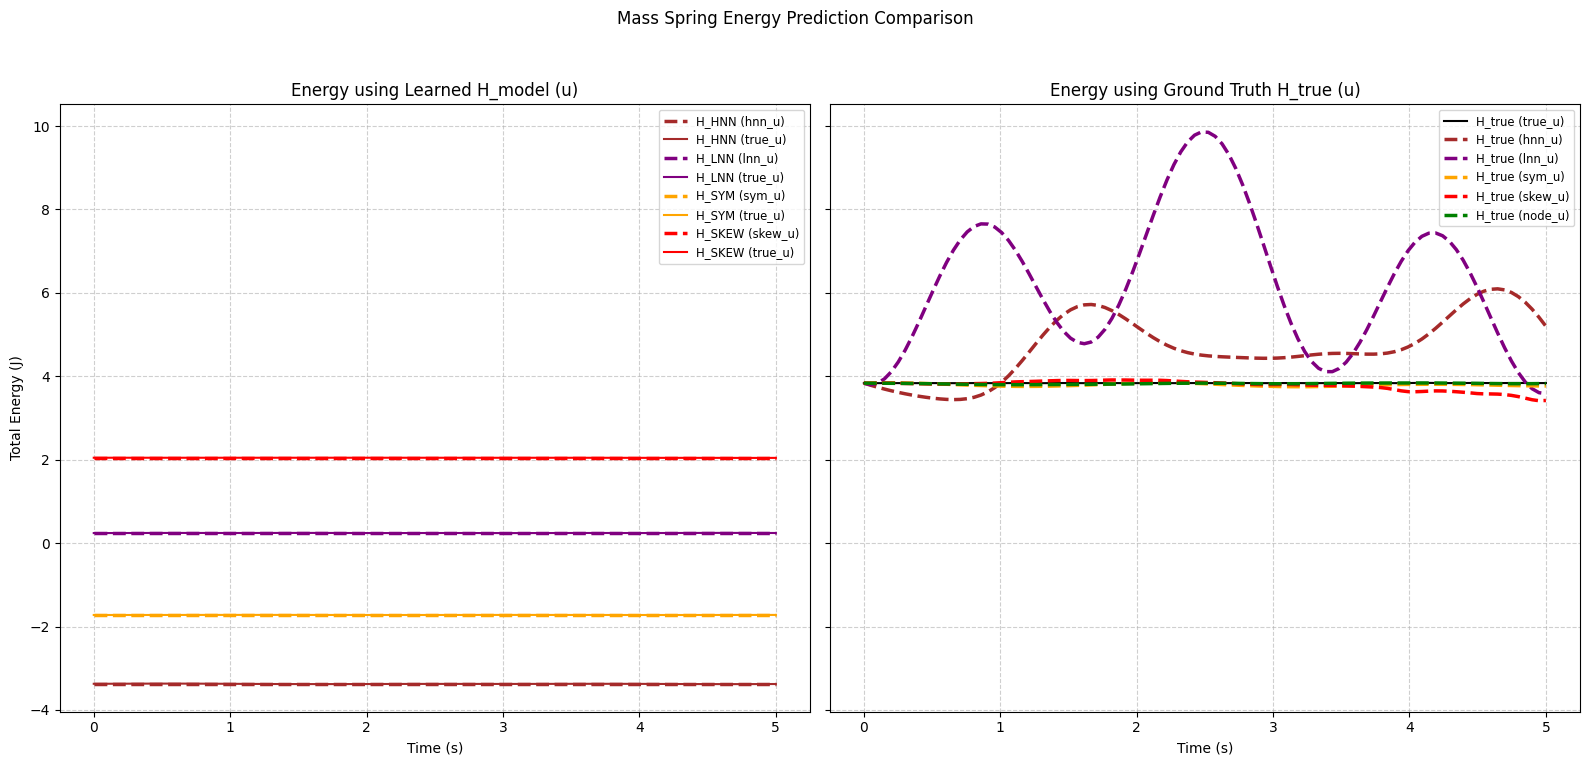

In [18]:
plot_energy_comparison_custom_labels_v5(t_eval, energy_data_list)